# Harshal Patel
## Research question/interests

Briefly describe your research question or interests here.

How has Covid-19 affected the active users of games on steam?

## Milestone 3

#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Method_Chain import load_process_covid

### Analysis Pipeline

#### Load Data

In [2]:
chord1 = pd.read_csv('../data/raw/SteamCharts.csv', encoding='latin')

#### Clean Data

In [3]:
df_covid = chord1.drop(['peak', 'avg_peak_perc', 'gamename','avg'], axis = 1)
# df_covid.pop()
# df_covid.pop()
# df_covid

#### Process Data & Wrangled

In [4]:
df_covid = df_covid.convert_dtypes()
df_covid

,year,month,gain
0,2021,February,-2196.42
1,2021,January,25405.91
2,2020,December,49049.17
3,2020,November,55087.89
4,2020,October,6816.37
...,...,...,...
83784,2017,July,-485.13
83785,2017,June,-231.92
83786,2017,May,415.61
83787,2017,April,720.21


In [5]:
df_covid.sort_values('year')
df_covid.dropna(0, inplace = True)
df_covid


C:\Users\HARSHA~1\AppData\Local\Temp/ipykernel_27728/2496084164.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df_covid.dropna(0, inplace = True)


,year,month,gain
0,2021,February,-2196.42
1,2021,January,25405.91
2,2020,December,49049.17
3,2020,November,55087.89
4,2020,October,6816.37
...,...,...,...
83783,2017,August,-139.09
83784,2017,July,-485.13
83785,2017,June,-231.92
83786,2017,May,415.61


In [6]:

df_year = df_covid.loc[df_covid['year'] == 2019]
df_year = df_year.loc [df_year['month'] == 'January ']     
gainJan2019 = df_year['gain'].mean()

df_year = df_covid.loc[df_covid['year'] == 2019]
df_year = df_year.loc [df_year['month'] == 'February ']     
gainFeb2019 = df_year['gain'].mean()

df_year = df_covid.loc[df_covid['year'] == 2019]
df_year = df_year.loc [df_year['month'] == 'March ']     
gainMar2019 = df_year['gain'].mean()

df_year = df_covid.loc[df_covid['year'] == 2020]
df_year = df_year.loc [df_year['month'] == 'January ']     
gainJan2020 = df_year['gain'].mean()

df_year = df_covid.loc[df_covid['year'] == 2020]
df_year = df_year.loc [df_year['month'] == 'February ']     
gainFeb2020 = df_year['gain'].mean()

df_year = df_covid.loc[df_covid['year'] == 2020]
df_year = df_year.loc [df_year['month'] == 'March ']     
gainMar2020 = df_year['gain'].mean()


data = {'Month': ['January', 'February', 'March', 'January', 'February', 'March'], 'Year': [2019,2019,2019,2020,2020,2020], 'AvgGainPerGame': [gainJan2019, gainFeb2019, gainMar2019, gainJan2020, gainFeb2020, gainMar2020 ]}  

df_covid_final = pd.DataFrame(data)
display(df_covid_final)


,Month,Year,AvgGainPerGame
0,January,2019,53.710861
1,February,2019,-193.870658
2,March,2019,-45.172004
3,January,2020,146.767372
4,February,2020,48.847547
5,March,2020,369.502472


### Method Chaining

In [7]:
print(load_process_covid('../data/raw/SteamCharts.csv'))

      Month  Year  AvgGainPerGame
0   January  2019       53.710861
1  February  2019     -193.870658
2     March  2019      -45.172004
3   January  2020      146.767372
4  February  2020       48.847547
5     March  2020      369.502472


In [8]:
df_covid_sorted = load_process_covid('../data/raw/SteamCharts.csv')
df_covid_sorted

,Month,Year,AvgGainPerGame
0,January,2019,53.710861
1,February,2019,-193.870658
2,March,2019,-45.172004
3,January,2020,146.767372
4,February,2020,48.847547
5,March,2020,369.502472


### Exploritory Data Analysis

#### Understanding your Variables

In [9]:
chord1.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%


In [10]:
print(chord1.shape)

(83789, 7)


In [11]:
print(chord1.dtypes)

gamename          object
year               int64
month             object
avg              float64
gain             float64
peak               int64
avg_peak_perc     object
dtype: object


In [12]:
chord1.columns

Index(['gamename', 'year', 'month', 'avg', 'gain', 'peak', 'avg_peak_perc'], dtype='object')

In [13]:
print(chord1.nunique(axis=0))

gamename          1260
year                10
month               12
avg              53471
gain             37276
peak             12748
avg_peak_perc    71491
dtype: int64


In [14]:
chord1.describe()

,year,avg,gain,peak
count,83789.000000,8.378900e+04,82529.000000,8.378900e+04
mean,2017.338708,2.792017e+03,-10.245559,5.518877e+03
std,2.237587,2.648480e+04,3789.944005,5.015571e+04
min,2012.000000,0.000000e+00,-250248.990000,0.000000e+00
25%,2016.000000,5.325000e+01,-38.310000,1.380000e+02
50%,2018.000000,2.042700e+02,-1.630000,5.020000e+02
75%,2019.000000,7.716500e+02,22.320000,1.741000e+03
max,2021.000000,1.584887e+06,426446.120000,3.236027e+06


#### Visualization

<AxesSubplot:>

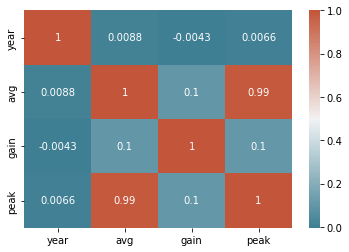

In [15]:
corr = chord1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='month', ylabel='gain'>

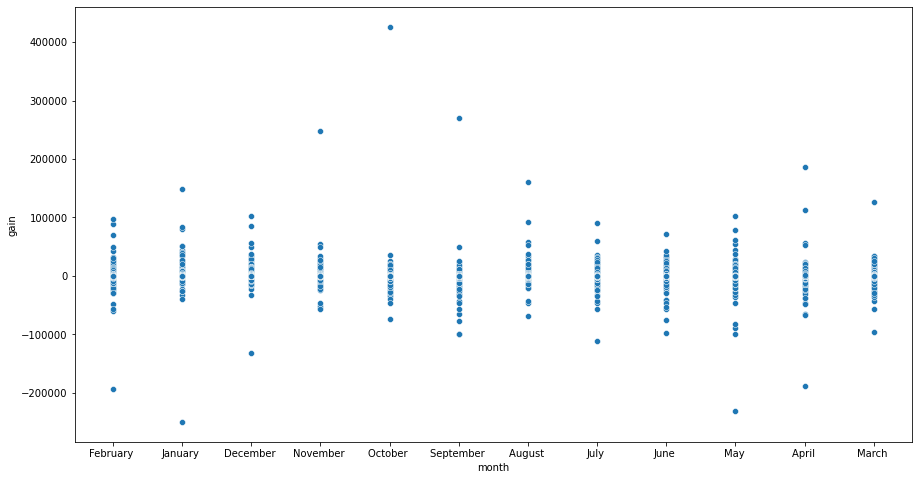

In [16]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(x = 'month', y='gain', data = chord1)

<AxesSubplot:xlabel='month', ylabel='avg'>

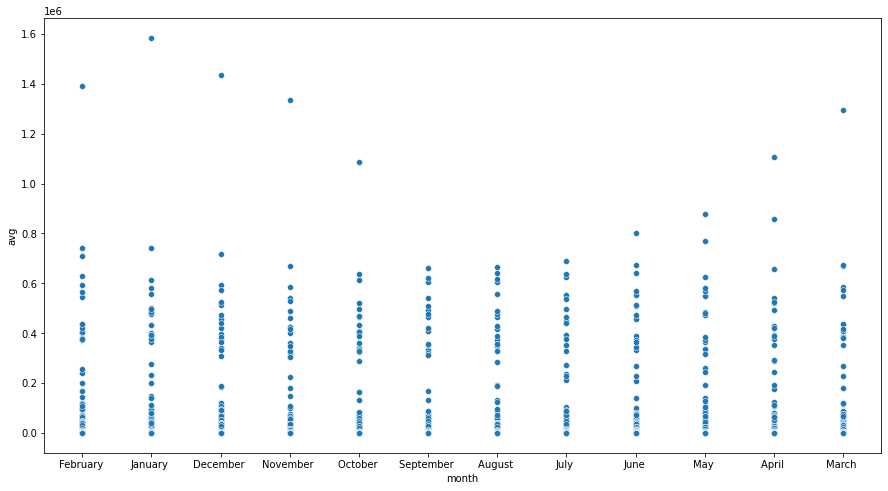

In [17]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.scatterplot(x = 'month', y = 'avg', data = chord1)

### Final Research Question Analysis (Task 4)

<AxesSubplot:xlabel='Month', ylabel='AvgGainPerGame'>

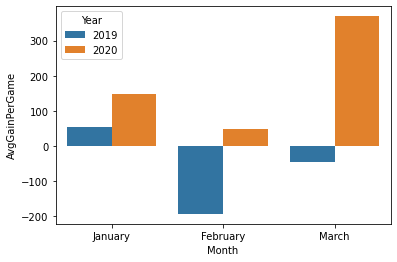

In [18]:
sns.barplot(x ='Month', y= 'AvgGainPerGame', hue = 'Year', data = df_covid_final)
